In [1]:
from colorscheme import colors

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ezephys import pltools

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
plt.rc('text', usetex = False)
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_individuals')
MOD_PATH = os.path.join('data', 'models')

# Sample traces

In [5]:
sample_traces = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    try:
        with open(
            os.path.join(
                MOD_PATH, celltype, '{}_goodcellsbenchmark_sample_traces.pkl'.format(celltype)
            ), 'rb'
        ) as f:
            sample_traces[celltype] = pd.DataFrame(pickle.load(f))
            f.close()
    except IOError:
        warnings.warn('Could not load sample traces for {}, skipping.'.format(celltype))

In [6]:
sample_traces['5HT'].head()

,5HT_AugmentedGIFs,5HT_GIFs,5HT_iGIF_NPs,Cell,Data,Input,Time
0,"{u'V': [-62.44283073713969, -62.44414327681962...","{u'V': [-62.44283073713969, -62.44463616450748...","{u'V': [-62.44283073713969, -62.44463616450748...",DRN307,"{u'V': [-62.44283073713969, -62.44170067880986...","[0.00042724612285383046, 0.00048828125, 0.0001...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
1,"{u'V': [-66.37700211467825, -66.3762495379932,...","{u'V': [-66.37700211467825, -66.37736189698705...","{u'V': [-66.37700211467825, -66.37736189698705...",DRN308,"{u'V': [-66.37700211467825, -66.25991119216224...","[0.01837158203125, 0.01849365234375, 0.0180664...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
2,"{u'V': [-54.20767474868103, -54.20945757773938...","{u'V': [-54.20767474868103, -54.21086811595364...","{u'V': [-54.20767474868103, -54.21086811595364...",DRN317,"{u'V': [-54.20767474868103, -54.34390574053214...","[0.02050781436264515, 0.02020263858139515, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
3,"{u'V': [-50.29780490431342, -50.29981981651265...","{u'V': [-50.29780490431342, -50.30470428397287...","{u'V': [-50.29780490431342, -50.30470428397287...",DRN318,"{u'V': [-50.29780490431342, -50.29378849362245...","[0.015441895462572575, 0.015441895462572575, 0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
4,"{u'V': [-55.92658907013903, -55.93179688115562...","{u'V': [-55.92658907013903, -55.93714224013458...","{u'V': [-55.92658907013903, -55.93714224013458...",DRN319,"{u'V': [-55.92658907013903, -56.09155246668678...","[-0.014465332962572575, -0.014831543900072575,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."


In [7]:
def sample_trace_plot(trace_df, ind, xlims, model_type, model_label, cell_color, model_color, current_scalebar_size=0.2, fname=None):
    
    spike_height = trace_df.loc[ind, 'Data']['V'].max() - 5.
    model_V_trace = trace_df.loc[ind, model_type]['V']
    model_V_trace[model_V_trace == 0.] = spike_height
    
    sample_tr_spec = gs.GridSpec(4, 1, height_ratios=[0.2, 1, 0.3, 0.3])
    
    plt.figure(figsize=(2, 2))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, 'Input'], 
        color='gray'
    )
    plt.xlim(xlims)
    pltools.add_scalebar(y_units='nA', y_size=current_scalebar_size, omit_x=True, anchor=(-0.05, 0.1), round=False)
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, 'Data']['V'], 
        color=cell_color, label='Real neuron'
    )
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, model_type]['V'], 
        color=model_color, alpha=0.6, label=model_label
    )
    plt.xlim(xlims)
    pltools.add_scalebar(x_units='ms', y_units='mV', x_size=500, y_size=50, bar_space=0, anchor=(-0.05, 0.2))
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(trace_df.loc[ind, 'Data']['spks'], color=cell_color)
    plt.xlim(xlims)
    pltools.hide_border('a')
    pltools.hide_ticks()
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(trace_df.loc[ind, model_type]['spks'], color=model_color)
    plt.xlim(xlims)
    pltools.hide_border('a')
    pltools.hide_ticks()
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    
    if IMG_PATH is not None and fname is not None:
        plt.savefig(os.path.join(IMG_PATH, fname))
        
    plt.show()

## mPFC sample traces

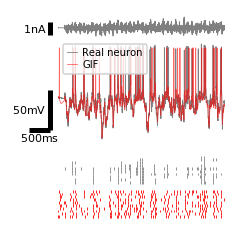

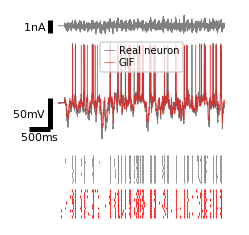

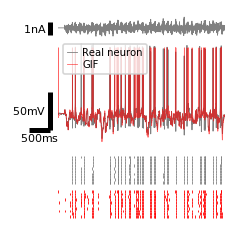

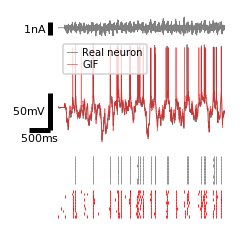

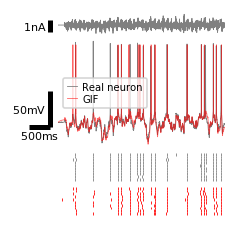

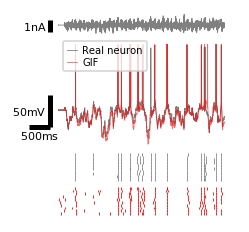

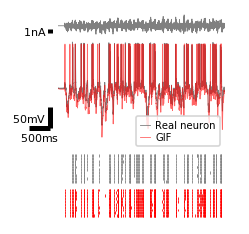

In [8]:
for i in range(sample_traces['mPFC'].shape[0]):
    sample_trace_plot(
        sample_traces['mPFC'], i, (0, 4000), 'mPFC_GIFs', 'GIF', colors['pyr'], 'r', 
        current_scalebar_size=1, fname='{}_sample_trace_{}.png'.format('mPFC_GIFs', i)
    )

## GABA sample traces

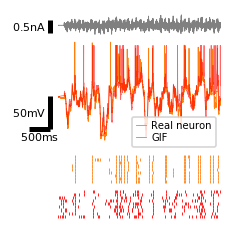

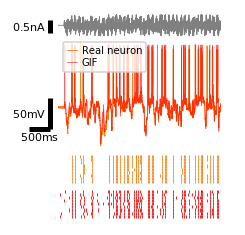

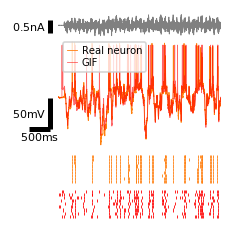

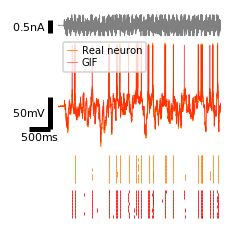

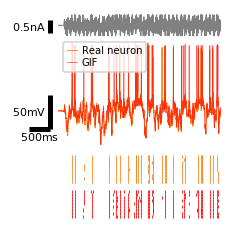

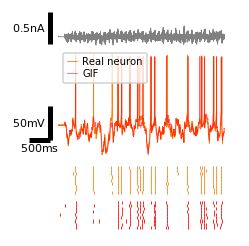

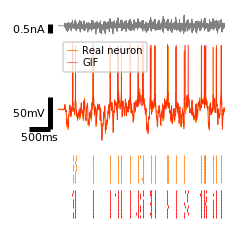

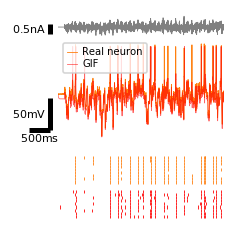

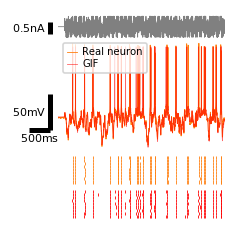

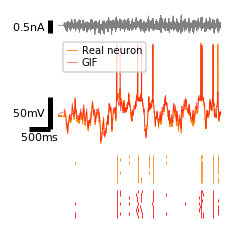

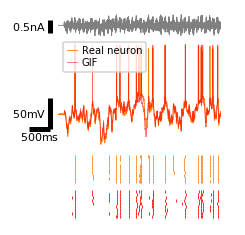

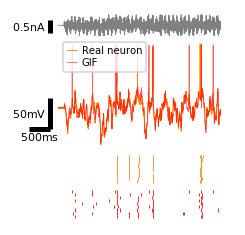

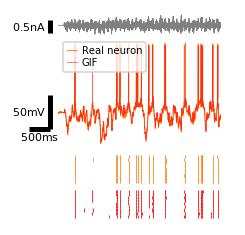

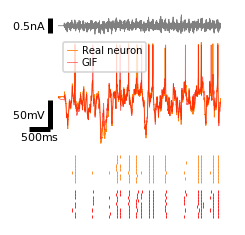

In [9]:
for i in range(sample_traces['GABA'].shape[0]):
    sample_trace_plot(
        sample_traces['GABA'], i, (0, 4000), 'GABA_GIFs', 'GIF', colors['som'], 'r', 
        current_scalebar_size=0.5, fname='{}_sample_trace_{}.png'.format('GABA_GIFs', i)
    )

## 5HT sample traces

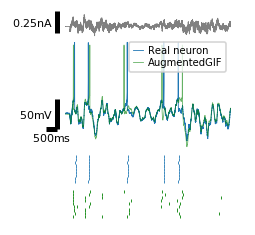

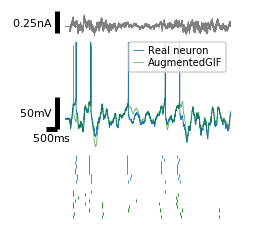

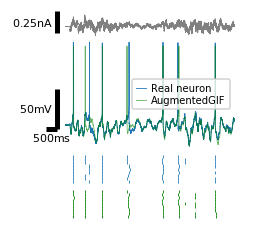

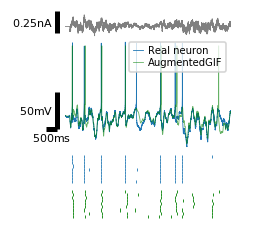

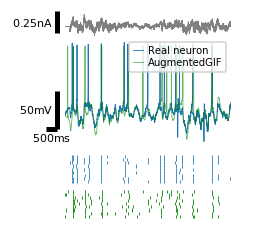

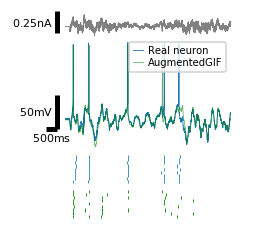

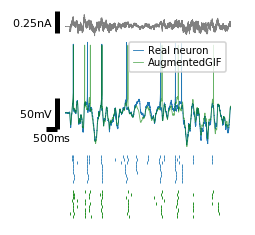

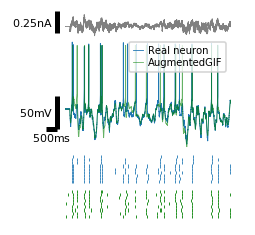

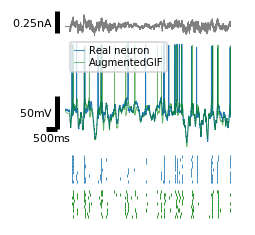

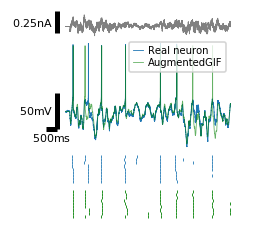

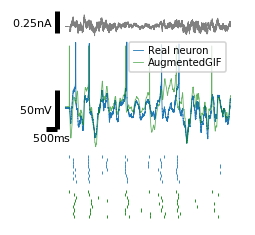

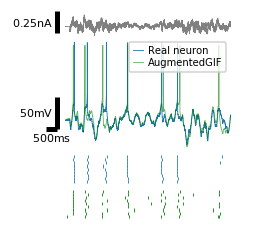

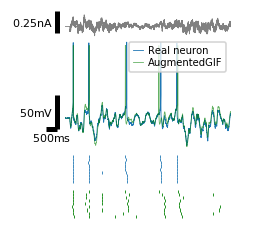

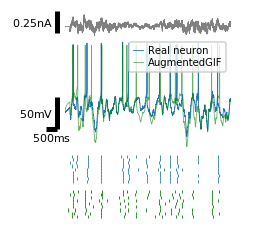

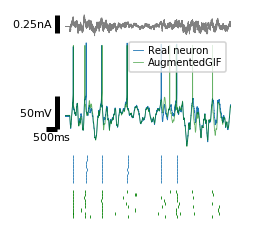

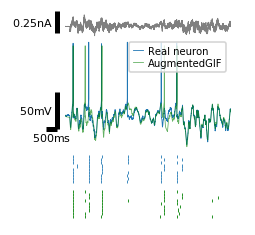

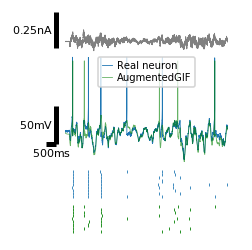

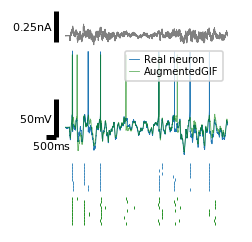

In [10]:
for i in range(sample_traces['5HT'].shape[0]):
    sample_trace_plot(
        sample_traces['5HT'], i, (0, 8000), '5HT_AugmentedGIFs', 'AugmentedGIF', colors['ser'], 'g',
        current_scalebar_size=0.25, fname='{}_sample_trace_{}.png'.format('5HT_AugmentedGIFs', i)
    )